# Overview

- The main objective of the project is to implement the binary classification algorithms Pocket algorithm, LDA, QDA, Logistic Regression.


- The data preprocessing is done so that the algorithms can be implemented.


- After that, some preliminary observations are made before proceeding to the actual algorithms.


- After implementing the algorithm, the accuracies of the algorithms must be checked by using the consusion matrix or area under curve etc. If the confusion matrix is known, many accuracies like precision, accuracy, f1 score, specificity, etc can be found.


- Libraries like pandas, matplotlib, numpy, etc are used in the project. For example, pandas is used to create a data frame and matplotlib is used for plotting the graphs.

# Data

## Description

- The dataset consists of the data that are generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope. The data consists of the following columns:
    1. fLength: continuous # major axis of ellipse [mm] 
    2. fWidth: continuous # minor axis of ellipse [mm] 
    3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
    4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
    5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
    6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
    7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
    8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
    9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
    10. fDist: continuous # distance from origin to center of ellipse [mm] 
    11. class: g,h # gamma (signal), hadron (background)
    

- Data source: https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

## Reading the data

In [2]:
#To ignore the runtime warnings by the packages
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
gamma = pd.read_csv("magic_gamma_telescope.csv")
gamma.shape

(19019, 11)

In [4]:
gamma.sample(5)

28.7967  16.0021  2.6449  0.3918  0.1982   27.7004   22.011  -8.2027  \
801    16.3607  11.5709  2.3522  0.5956  0.3089   -2.3935   6.7419  -4.0054   
6208   78.6836  22.7240  3.0265  0.2070  0.1058 -113.1730  75.4384  -4.4445   
7053   51.4864  16.5539  2.8442  0.2806  0.1496   47.9978  35.2857 -11.8249   
10499  54.1757  30.0162  3.6714  0.2087  0.1107   22.9775  31.2252 -21.4603   
18746  31.2328  14.1452  2.6107  0.5454  0.3454    5.3276  12.9491  18.4301   

        40.092   81.8828  g  
801    35.4270  155.9500  g  
6208    1.7320  216.9810  g  
7053    7.8974  168.7580  g  
10499  47.7300   42.5206  g  
18746  44.5937  173.4713  h

### Observation

Column names are not present in the dataset. So they need to be added.

## Preprocessing the data

In [5]:
#Adding column names to the UCI repository dataset
col_name=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
gamma = pd.read_csv("magic_gamma_telescope.csv",names=col_name)
from sklearn.utils import shuffle
gamma = shuffle(gamma)
gamma.sample(5)

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
9771   33.3747  16.9277  2.5623  0.3589  0.1795  44.1889  20.9917   14.4195   
1256   37.5027  11.3126  2.6459  0.3661  0.1887 -51.6600  17.7277   -8.4649   
4043   92.3071  34.2421  3.9473  0.1339  0.0688 -55.6408  74.7856  -31.5922   
16561  83.7799  29.4591  3.0495  0.2704  0.1286  13.6481  77.4344   15.1214   
10890  50.7850  17.3540  2.6594  0.3308  0.1676   6.0281  29.5191  -10.0348   

        fAlpha     fDist class  
9771   13.5110  232.1750     g  
1256   18.0050   98.0529     g  
4043    0.0972  304.3840     g  
16561  30.1801  204.2784     h  
10890   2.2910  170.8320     g

### Observation

Column 'class' is having the alphabets as values. So it need to be converted to 'integers'.

In [6]:
mapping = {'g': -1, 'h': 1}
gamma = gamma.replace({'class': mapping})
gamma.sample(5)

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
6006    90.6632   8.7308  2.5085  0.4620  0.2310   76.8586  58.0497   -4.5494   
10104   22.2724   0.0000  2.1508  0.7279  0.4488   -0.2118   5.0000    0.0001   
15434  128.9450  47.1696  3.4816  0.1066  0.0536 -165.2870 -90.9151  -20.2129   
4212    68.0663  22.5312  3.1543  0.2243  0.1251   76.9274  47.6190   12.6088   
4922    43.0126  15.2872  2.6968  0.3136  0.1578   56.8591  25.3144   15.3148   

        fAlpha     fDist  class  
6006   18.4530  297.0480     -1  
10104  46.1424  216.1860     -1  
15434  58.5095   85.5954      1  
4212   10.4946  241.1180     -1  
4922    2.4997  222.9330     -1

In [7]:
#Checking if there are any null values
gamma.isnull().values.any()

False

### Observation

No null values are present in the dataset.

In [8]:
#Finding the correlation
correlation = gamma.corr(method='pearson')
print (correlation)

           fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
class     0.307572  0.265596  0.117795 -0.024615 -0.004797 -0.173587   

           fM3Long  fM3Trans    fAlpha     fDist     class  
fLength  -0.119747  0.013389 -0.008777  0.418466  0.307572  
fWidth   -0.1

### Observation

- No two different columns have correlation 1. Some columns have strong correlation like fLength and fWidth. But they are not approximately equal to 1 as we saw in the previous dataset.

- Positive correlation implies that value of second column linearly increases with the increase in value of first column and negative correlation implies that value of second column linearly decreases with the increase in value of first column. This relation can be clearly identified in the dataset by comparing some values and checking if two columns are directly proportional or inversely proportional.

In [9]:
gamma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 17716 to 6099
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
class       19020 non-null int64
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


### Observation

All values are appropriate.

## Plots for understanding or analysis

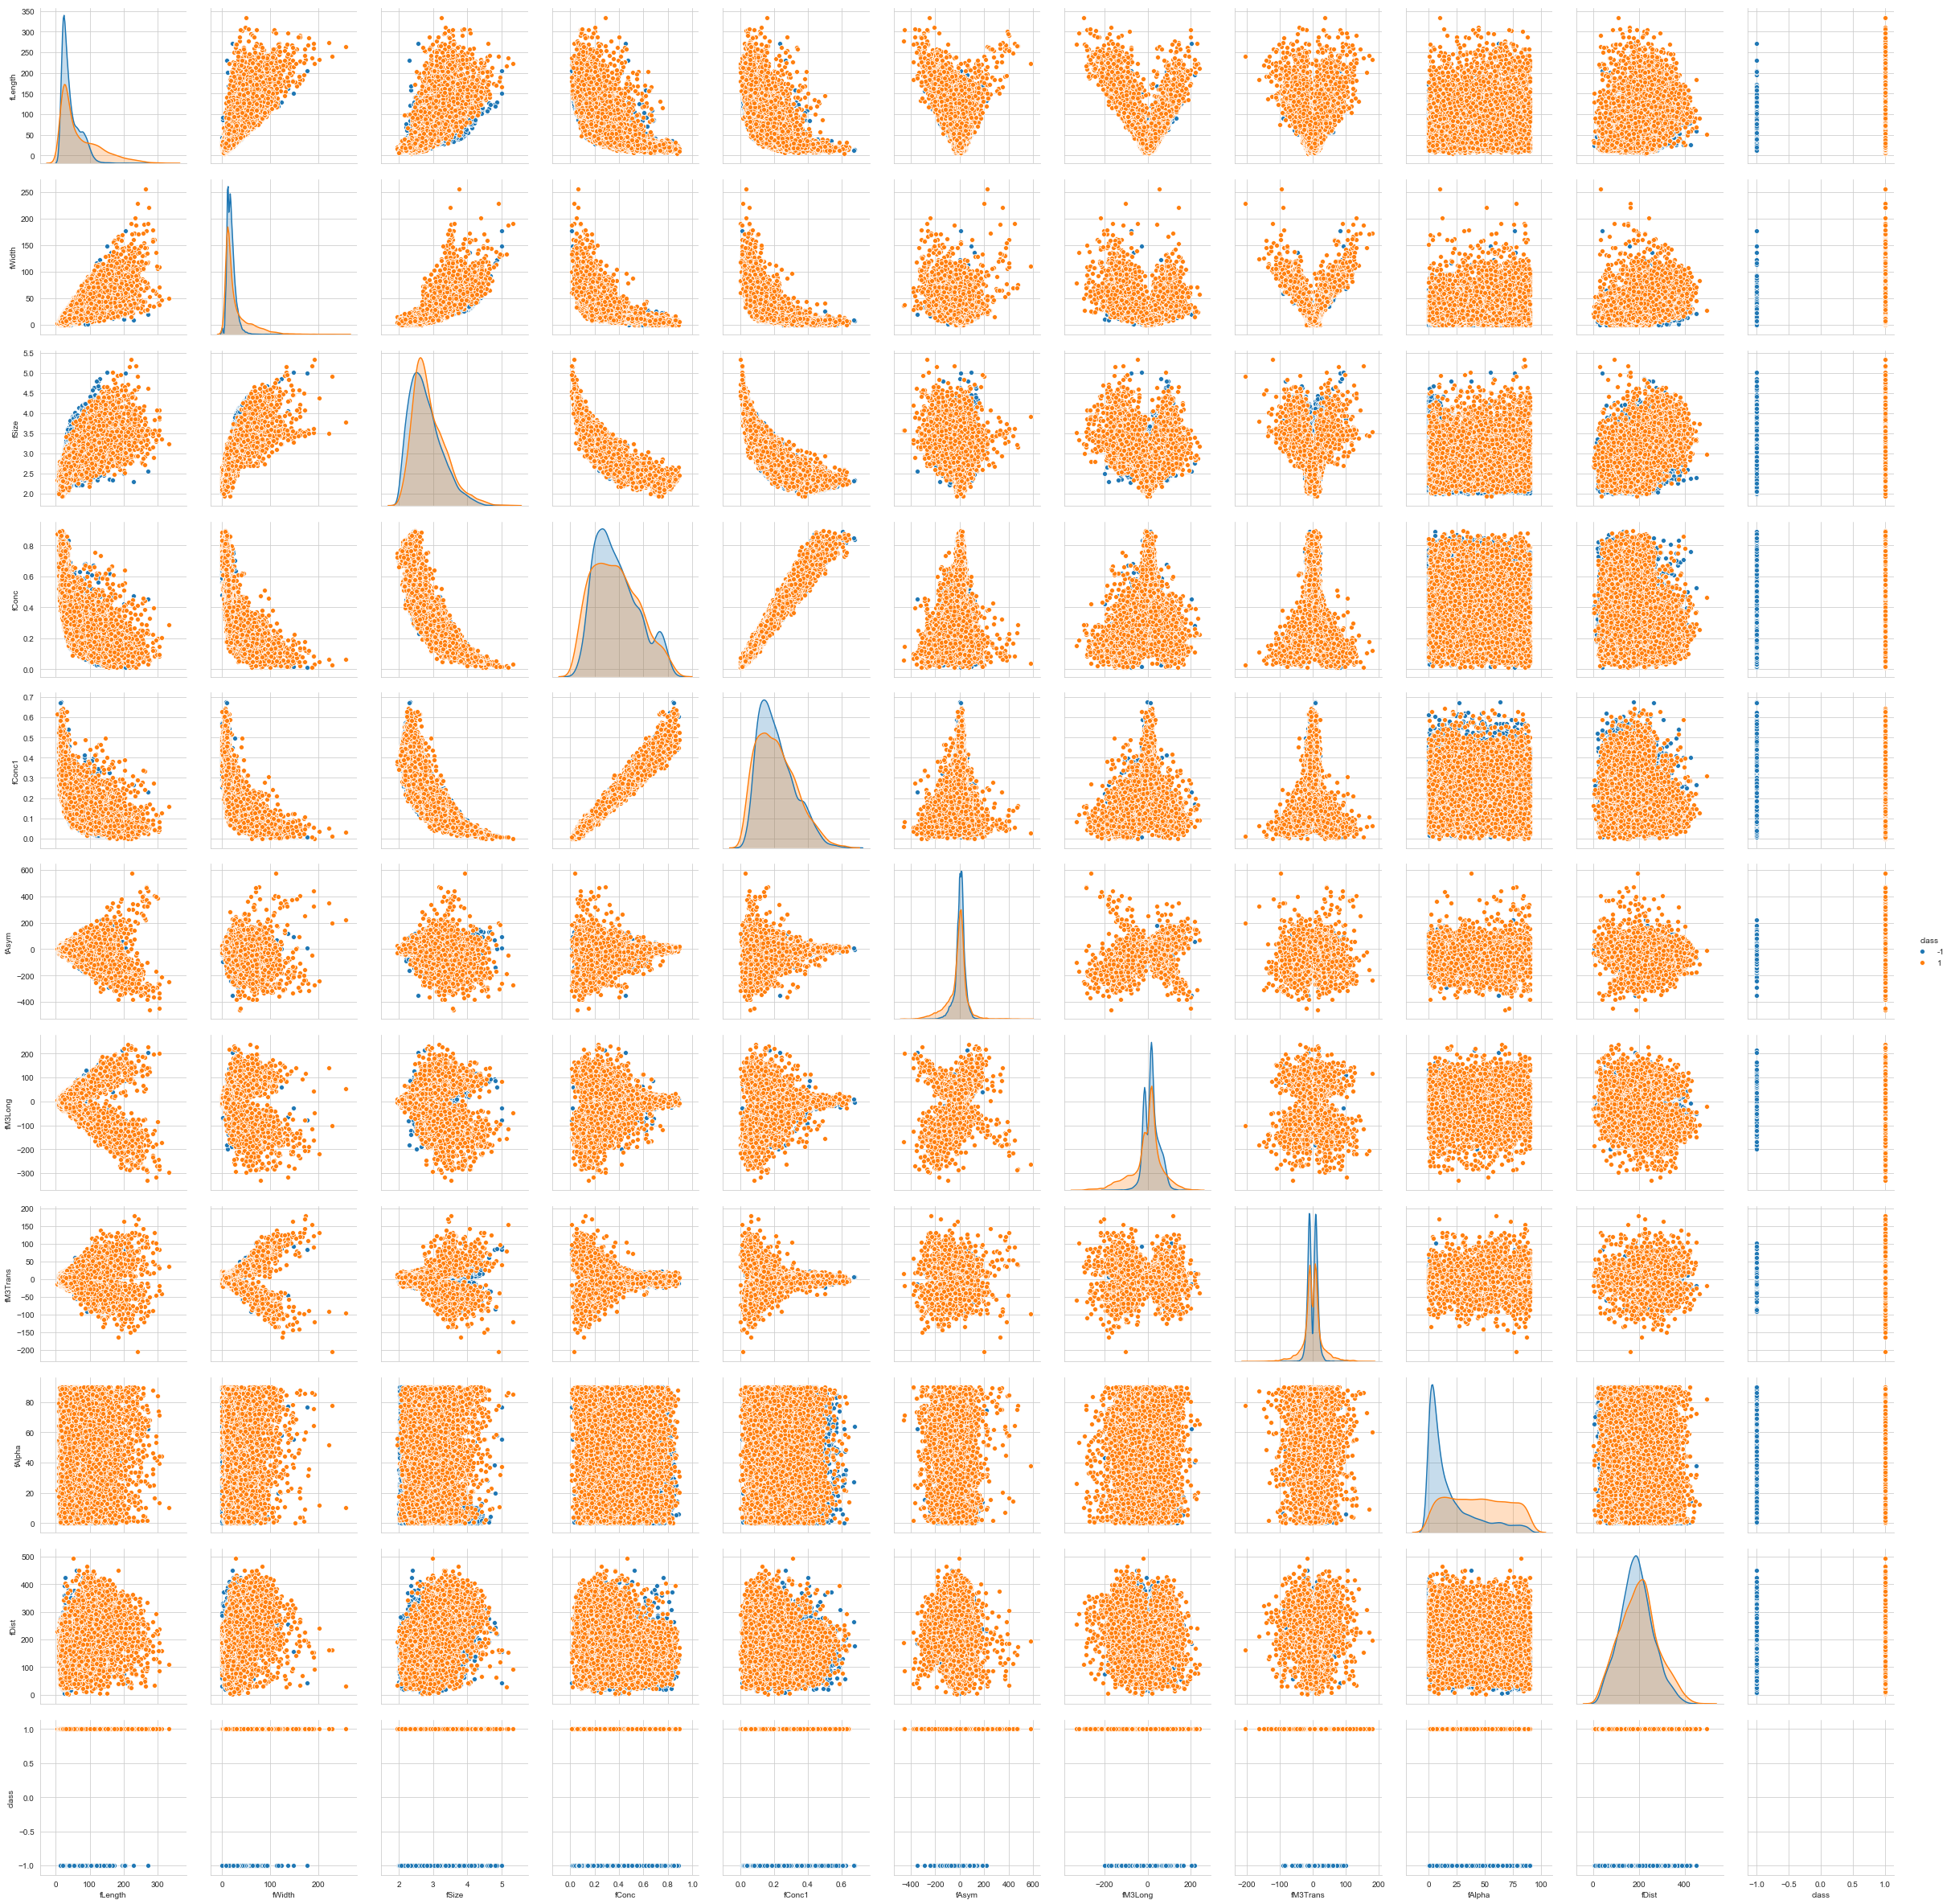

In [10]:
sns.set_style("whitegrid");
sns.pairplot(data=gamma, hue="class",kind='scatter', height=3);
plt.show()

### Observation

No need to use 'class' in pair plot since it is the class label, it will be shown as hue parameter (Last row and column need not be considered).

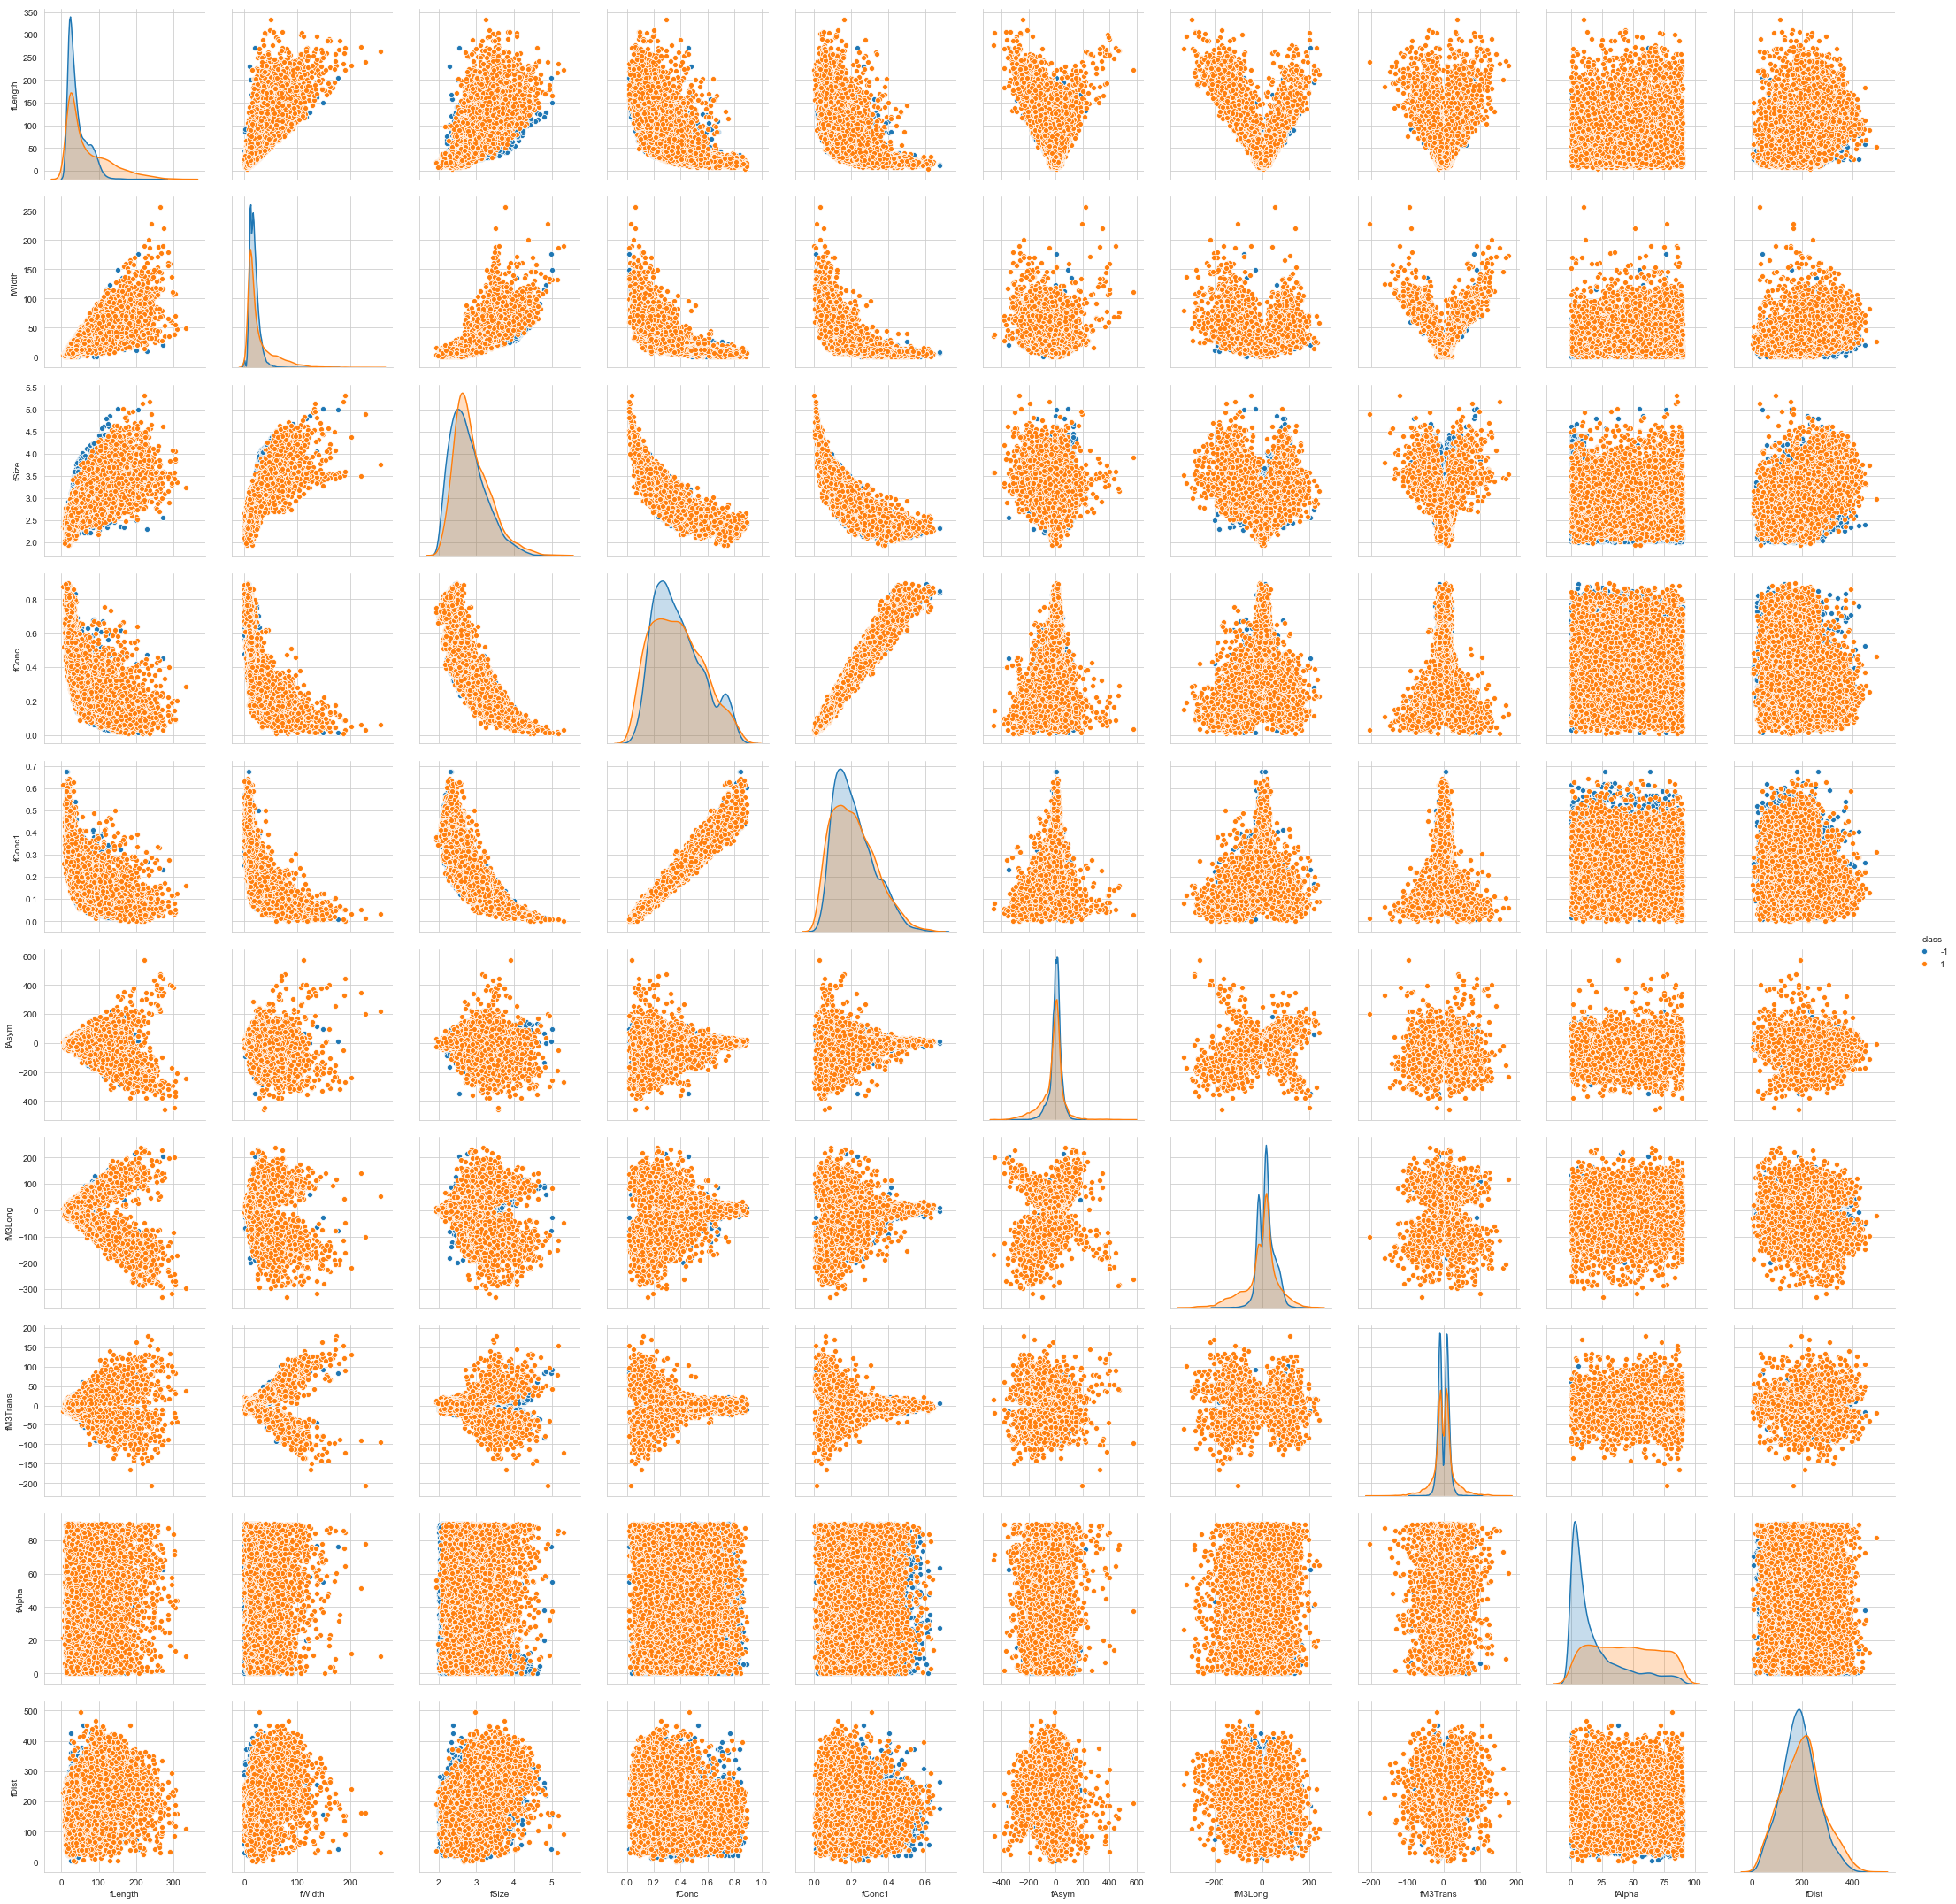

In [11]:
#Pair plot without the column 'class'
sns.set_style("whitegrid");
sns.pairplot(data=gamma, hue="class",vars=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'],kind='scatter', height=3);
plt.show()

### Observation

1) The upper triangular matrix and lower triangular matrix are same with x-axis becomeing y-axis and viceversa. So we can consider just upper triangular matrix or lower triangular matrix (graphs below the diagonal/graphs above the diagonal).

2) We cannot classify the data with simple is else statements due to high overlapping of data.

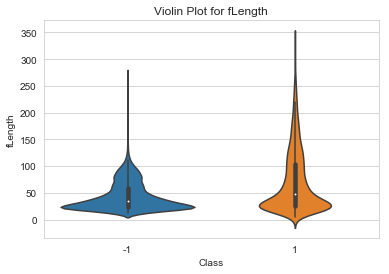

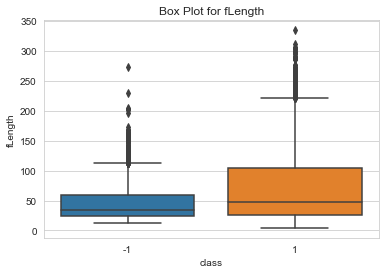

In [12]:
sns.violinplot(x='class',y='fLength',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fLength");
plt.show();

sns.boxplot(x='class',y='fLength', data=gamma)
plt.title('Box Plot for fLength')
plt.show()

### Observation

From the above plots, it is clear that class gamma(-1) has less median value for fLength than for class hadron(1). Around fLength = 25, the density of gamma is more than hadron.

Anything above fLength > 130(approx from the graph we visualize), then there is very high chance of it becoming class hadron.

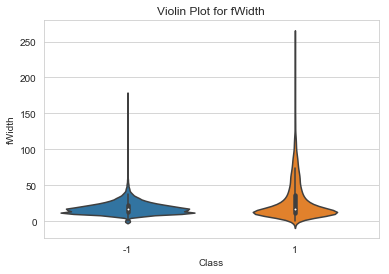

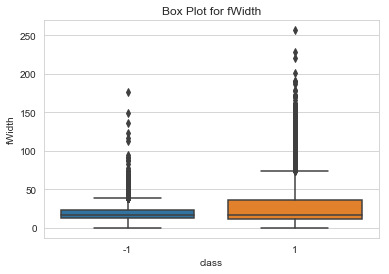

In [13]:
sns.violinplot(x='class',y='fWidth',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fWidth");
plt.show();

sns.boxplot(x='class',y='fWidth', data=gamma)
plt.title('Box Plot for fWidth')
plt.show()

### Observation

Around fWidth = 15, the density of gamma(-1) is more than hadron(1).

Anything above fWidth > 55(approx from the graph we visualize), then there is very high chance of it becoming class hadron.

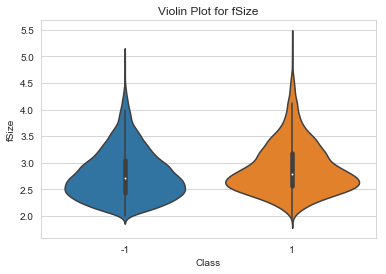

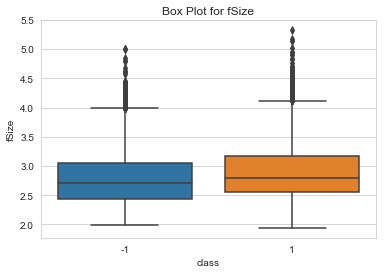

In [14]:
sns.violinplot(x='class',y='fSize',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fSize");
plt.show();

sns.boxplot(x='class',y='fSize', data=gamma)
plt.title('Box Plot for fSize')
plt.show()

### Observation

From the above plots, it is clear that class gamma(-1) has slightly less median value for fSize than for class hadron(1). Around fSize = 2.5, the density of hadron is more than gamma.

Anything above fsize > 4.5(approx from the graph we visualize), then there is very high chance of it becoming class hadron.

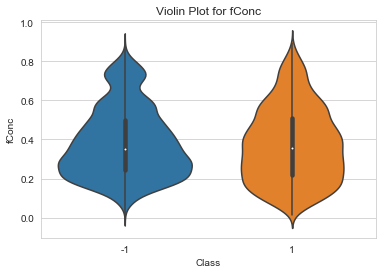

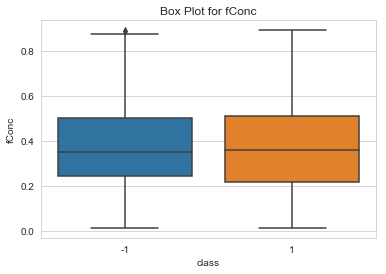

In [15]:
sns.violinplot(x='class',y='fConc',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fConc");
plt.show();

sns.boxplot(x='class',y='fConc', data=gamma)
plt.title('Box Plot for fConc')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fConc alone is very difficult due to high overlapping of data.

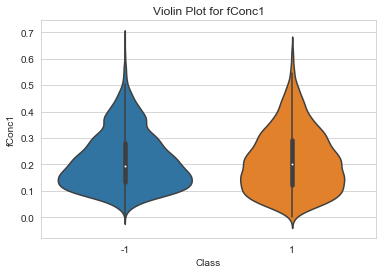

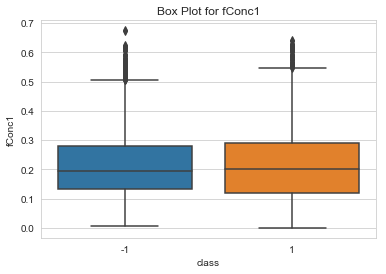

In [16]:
sns.violinplot(x='class',y='fConc1',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fConc1");
plt.show();

sns.boxplot(x='class',y='fConc1', data=gamma)
plt.title('Box Plot for fConc1')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fConc1 alone is very difficult due to high overlapping of data.

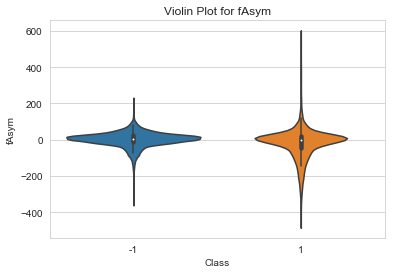

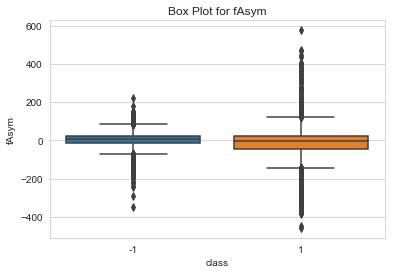

In [17]:
sns.violinplot(x='class',y='fAsym',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fAsym");
plt.show();

sns.boxplot(x='class',y='fAsym', data=gamma)
plt.title('Box Plot for fAsym')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fAsym is very alone due to high overlapping of data. But we can say by considering the density in violin plot that when fAsym is < -180, then there is high chance of it becoming class hadron.

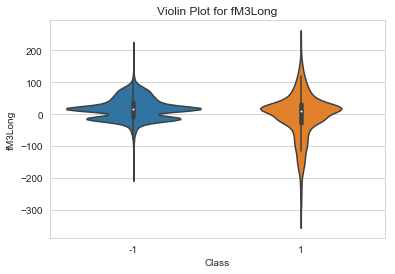

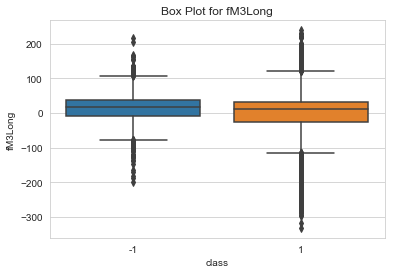

In [18]:
sns.violinplot(x='class',y='fM3Long',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fM3Long");
plt.show();

sns.boxplot(x='class',y='fM3Long', data=gamma)
plt.title('Box Plot for fM3Long')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fConc is very alone due to high overlapping of data. But we caan say by considering the density in violin plot that when fM3Long is >100 or < -180, then there is high chance of it becoming class hadron.

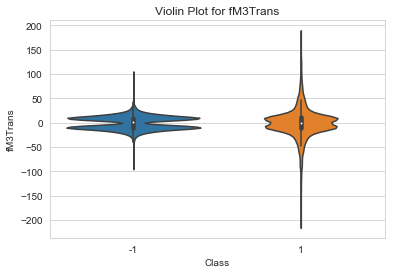

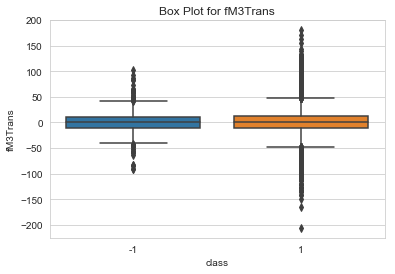

In [19]:
sns.violinplot(x='class',y='fM3Trans',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fM3Trans");
plt.show();

sns.boxplot(x='class',y='fM3Trans', data=gamma)
plt.title('Box Plot for fM3Trans')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fM3Trans alone is very difficult due to high overlapping of data.

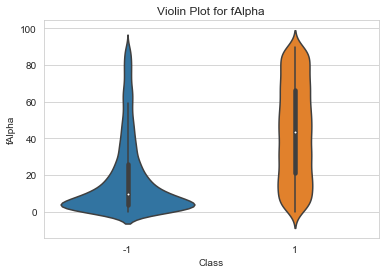

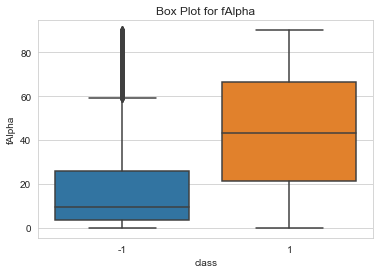

In [20]:
sns.violinplot(x='class',y='fAlpha',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fAlpha");
plt.show();

sns.boxplot(x='class',y='fAlpha', data=gamma)
plt.title('Box Plot for fAlpha')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fAlpha alone is very difficult due to high overlapping of data. But the median for class gamma is very less than the median for class hadron.

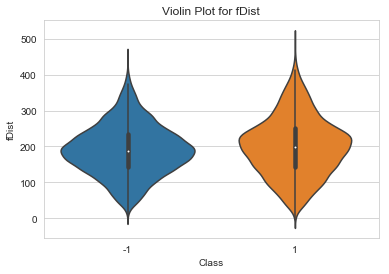

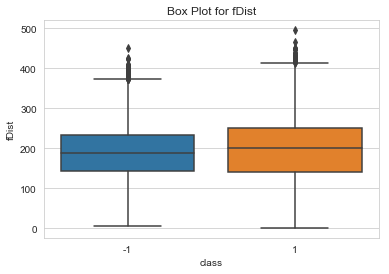

In [21]:
sns.violinplot(x='class',y='fDist',data=gamma);
plt.xlabel("Class");
plt.title("Violin Plot for fDist");
plt.show();

sns.boxplot(x='class',y='fDist', data=gamma)
plt.title('Box Plot for fDist')
plt.show()

### Observation

Classification of classes gamma(-1) and hadron(1) is very difficult by using fDist alone is very difficult due to high overlapping of data.

## Preliminary observation

- Preprocessing the data and selecting appropriate plotting technique is very important while visualizing the data. Like for example, selecting scatter plot for categorical variables doesn't provide us with any useful visualization and if one column has strings instead of integers, it cannot be plotted on a graph. So it needed to be changed to integers.


- The visualizations done for the regression can be exactly correlated to real life like more users using the bike sharing when the weather is good and the users reduce by the deteriorating weather.


- For categorical variables like month and season, box plot must be used for visualizing the data.


- Scatter plot cannot give nice results if the data is highly overlapping.


- Classification of the data cannot be done diretly for the dataset used just by using visualization techniques due to high overlapping of data.


- Some sort of machine learning algorithm must be used to exactly classify the data.

# Methods

## Summary of Classification models

### Pocket algorithm

- Pocket algorithm is used to get better results compared to the perceptron algorothm.

- The pocket algorithm keeps the best results so far in the pocket.

- In pocket algorithm, a maximum number of iterations is given and the  weight is updated in each iteration till convergence is occured.
    $$\\w^{(k+1)} = w^{(k)} + α*t_i *x_i$$ 

### QDA

- QDA computes discriminant function and by using that discriminant function values, we can predict the classification.


- The discriminant function formula is:
    $$\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). $$


- Now by using the discriminant functions, we can find the target value by using the formula:
    $$y = \arg\max_k \delta_k(\tilde{x}). $$

- The decision boundary is placed where the discriminant functions meet such as δ1==δ2.


- Since the δk function is quadratic in x, the decision boundary is quadratic. We call this approach as Quadratic Discriminant Analysis (QDA).

### LDA

- LDA is similar to QDA in implementation, but the only place the algorithm differs is the calculation of the discriminant.


- In LDA, instead of the different sigma values for different target classes, only one sigma is used.


- That sigma is calculated by using the covariance of the entire data.\


- LDA can be used to remove undersampling, thereby reduces the chance of overfitting.

## Logistic Regression

- Logistic regression algorithm is like linear regression but predicts the probability P(T=k∣x) instead of  predicting the class label.


- Here the weight is not a vector, but it is a matrix with (D+1) x K dimensions.


- The gradient descent method is used to update the weights.


- Softmax function is used so that the outputs are non-negative and the integral of the probability is 1.

## Pocket, LDA, QDA, Logistic Regression

### Super class code

In [22]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### Explanation of Super class code

- Super class is the super class of all the algorithms. So the functions defined in here can be used in any algotitm that imports this class.


- The super class above has some functions which will be used in every algorithm such as normalize(used to normalize the data  so that we get better accuracy) and add_ones(adds ones to the matrix passed to it).


- The class also has some abstract method definitions which can be ignored. They are just given so that the outline of the ither algorithms are understood.

### Evaluation metrics class code

In [23]:
class measurements():
    
    # Confustion matrix 

    def confusion_matrix(self, Y, T):
        """
            Y    ndarray
                 predicted labels
            T    ndarray
                 target labels

            @cfm DataFrame
                 confusion matrix
        """

        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")

        classes = np.unique(T)
        n_classes = len(classes)

        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)

        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

        return cfm

    def performance_metrics(self, Y, T):
        
        from sklearn import metrics
        from sklearn.metrics import roc_auc_score
        cfm = self.confusion_matrix(Y, T)
        accuracy = (cfm[1][1]+cfm[-1][-1])/(cfm[1][1]+cfm[1][-1]+cfm[-1][1]+cfm[-1][-1])
        precision = cfm[1][1]/(cfm[1][1]+cfm[-1][1])
        recall = cfm[1][1]/(cfm[1][1]+cfm[1][-1])
        specificity = cfm[-1][-1]/(cfm[-1][-1]+cfm[-1][1])
        f1 = 2*((precision*recall)/(precision+recall))
        print ('Accuracy ', accuracy*100,'%')
        print ('Precision ', precision)
        print ('Recall ', recall)
        print ('Specificity ', specificity)
        print ('f1 score ', f1)
        area = roc_auc_score(Y, T)
        print('Area under curve ',area)

### Explanation of the mesurements class code

- The measurements class is used to evaluate the correctness of the results produced.


- In this method, the confusion matrix is calculated. By using the confusion matrix terms, we can calculate other metrics such as accuracy, precision, recall, cpecificity, f1 score.


- sklearn library is used to find the area under the curve.


- By calculating all the above, we can compare one algorithm with another or even change test, train data and see how each time the algorithm is performing.

### Pocket Algorithm code

In [24]:
from copy import deepcopy as copy
class pocket(Classifier):
    
    def __init__(self, iteration ):
        Classifier.__init__(self)
        self.maxiter = iteration
        self.alpha = 0.1
    
    # return 1 if w is better -1 if wp is better
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    def train(self, X, T):
        N = X.shape[0]
        X = self.normalize(X)
        X1 = self.add_ones(X)
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w)
        
        for i in range(self.maxiter):
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X1[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X1, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        
    
    def use(self, X):
        X1 = self.add_ones(X)
        y = np.sign(X1@self.w_pocket)
        return y

### Explanation of Pocket algorithm code

- Pocket algorithm imports the super class. So it can access all the methods of super class.


- Pocket algorithm initializes the weight values and iterates till it converges or the number of iterations will be equal to the maxiter value given.


- Learning rate alpha determines how quickly the weight will converges.


- If convergence is occured, then the train method stops training or else the best weights are stored.


- Finally, the use method can be used to determine the target class labels by multiplying the weights with the training data.

### QDA code

In [25]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def discriminant(self, X, mu, sigma, prior):
        sigma_inverse = np.linalg.inv(sigma)
        difference = X - mu
        disc = -0.5* np.log(np.linalg.det(sigma)) - 0.5* np.sum(difference @ sigma_inverse * difference, axis=1) + np.log(prior)
        return disc
    
    def train(self, X, T):
        N1 = np.sum([T == -1])
        N2 = np.sum([T == 1])
        N = N1 + N2
        Xs = self.normalize(X)
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)
        self.Sigma1 = np.cov(Xs[:N1].T)
        self.Sigma2 = np.cov(Xs[N1:].T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N

    def use(self, X):
        y = []
        XtestS = self.normalize(X)
        d1 = self.discriminant(XtestS, self.mu1, self.Sigma1, self.prior1)
        d2 = self.discriminant(XtestS, self.mu2, self.Sigma2, self.prior2)
        for i in range(d1.shape[0]):
            if d1[i]>d2[i]:
                y.append(-1)
            else:
                y.append(1)
        return y

### Explanation of QDA code

- QDA imports the super class defined above and can use the super class functions.


- QDA has a train method that trains the data, use function to predict the class labels.


- In train method, mean, sigma and prior values are computed.


- Use method is uses the mean, sigma and prior values found by the train methods are passed to the discriminant method along with the test data.


- The discriminant method returns the QDA discriminant and finally the higher values of d1 or d2 will determing the class label.

### LDA code

In [26]:
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def discriminant(self, X, mu, sigma, prior):
        sigma_inverse = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inverse) * mu - 0.5 * np.dot(mu, sigma_inverse) * mu + np.log(prior), axis=1)
    
    def train(self, X, T):
        N1 = np.sum([T == -1])
        N2 = np.sum([T == 1])
        N = N1 + N2
        Xs = self.normalize(X)
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)
        self.Sigma = np.cov(Xs[:N1].T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N

    def use(self, X):
        y = []
        XtestS = self.normalize(X)
        d1 = self.discriminant(XtestS, self.mu1, self.Sigma, self.prior1)
        d2 = self.discriminant(XtestS, self.mu2, self.Sigma, self.prior2)
        for i in range(d1.shape[0]):
            if d1[i]>d2[i]:
                y.append(-1)
            else:
                y.append(1)
        return y

### Explanation of LDA code

- LDA code is similar to the QDA code.


- LDA imports the super class defined above and can use the super class functions.


- LDA has a train method that trains the data, use function to predict the class labels.


- In train method, mean, sigma and prior values are computed.


- Use method is uses the mean, sigma and prior values found by the train methods are passed to the discriminant method along with the test data.


- The discriminant method returns the LDA discriminant and finally the higher values of d1 or d2 will determing the class label.


- The only difference between QDA and LDA is that in LDA, only one sigma value is passed to the discriminant method.

## Logistic Regression code

In [27]:
class logistic(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.niter = 1
        self.alpha = 0.000001
    
    # g(.) the softmax function

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self, X, w):
        return self.softmax(X @ w)
        
    def train(self, X, T):
        X1 = self.add_ones(X)
        D = X.shape[1]
        #K = 2 since this is a binary classification
        K = 2
        
        # initialize the weight matrix
        self.w = np.random.rand(D+1, K)
        T1 = self.add_ones(T)
        
        for step in range(self.niter):
            self.w += self.alpha *X1.T@ (T1 - self.g(X1, self.w))
        
    def use(self, X):
        X1 = self.add_ones(X)
        y = []
        for i in range(self.g(X1, self.w).shape[0]):
            c = self.g(X1, self.w)
            if c[i][0] > c[i][1]:
                y.append(-1)
            else:
                y.append(1)
        return y
        

## Explanation of the Logistic Regression code

- Logistic regression imports the super class. So it can access all the methods of super class.


- In logistic regression, the train method trains the algorithm by taking the training data.


- Some random weights are initialized and updated at each step. It uses softmax function in the formula.


- The use method also uses the softmax function and then predicts the target class label.


- Softmax method takes the matrix and weights as input and gives outputs that are non-negative and the integral of the probability is 1.

# Experiments

## Discussion about the evaluation metrics

- Evaluation metrics are used to find the correctness of the algorithm's output.


- First the confusion matrix needed to be calculated so that we know true negative(TN), true positive(TP), false positive(FP) and false negative(FN) values.


- From the confusion matrix, we can predict the following values.


- Precision: The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.
    $$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$


- Recall (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class.
    $$\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$


- Specificity (True Negative Rate): Considering imblance or difference in class, we consider TNR as well.
    $$\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$


- Similarly f1 score can be calculated using the formula:
    
    f1 = 2 * ((precision * recall)/(precision + recall))
    

- Accuracy is given by the formula:
    
    accuracy = (total number of correct classification)/(total number of samples)
    
    
- Area under the curve is used to determine the graphical measurement such as precision-recall curve. Area under the curve is determined in the algorithm using sklearn library.

## Splitting the data

In [29]:
gamma2 = gamma
train = gamma2.sample(frac = 0.8)
test = gamma2.drop(train.index)

## Pocket algorithm training and testing

End of training:  999


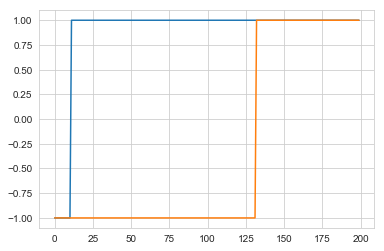

In [30]:
#Pocket algorithm
X = np.array([train['fLength'],train['fWidth'],train['fSize'],train['fConc'],train['fConc1'],train['fAsym'],train['fM3Long'],train['fM3Trans'],train['fAlpha'],train['fDist'],])
X = np.transpose(X)
T = np.array(train['class'])
T = np.reshape(T,(T.shape[0],1))

pck = pocket(1000)
pck.train(X[:400],T[:400])

X_test = np.array([test['fLength'],test['fWidth'],test['fSize'],test['fConc'],test['fConc1'],test['fAsym'],test['fM3Long'],test['fM3Trans'],test['fAlpha'],test['fDist'],])
X_test = np.transpose(X_test)
T_test = np.array(test['class']) 
Y = pck.use(X_test[:200])
plt.plot(np.sort(Y,0))
#print (len(T_test))
plt.plot(np.sort(T_test[:200],0))
plt.show()

<font color=blue>**NOTE:**</font>

*Pocket algorithm is taking too much time to compute the results. So the data size is reduced to reduce the computation time. The performance changes each time since I am taking the last 400 values of the shuffled data*

### Observation

- As we can see from the graph, the actual data and the predicted data are not following same path always. This can be seen in the reduction in the accuracy. This is due to taking the reduced training data size.


- The graph and the accuracy changes each time the number of iterations or learning rate is changed.

## Pocket algorithm statistics

In [31]:
stat = measurements()
stat.confusion_matrix(Y, T_test[:200])

-1   1
-1    7   4
 1  125  64

In [32]:
stat.performance_metrics(Y, T_test[:200])

Accuracy  35.5 %
Precision  0.3386243386243386
Recall  0.9411764705882353
Specificity  0.05303030303030303
f1 score  0.49805447470817116
Area under curve  0.4874939874939875


### Discussion about the accuracy

- Accuracy is less in the above case becaue only a part of the whole data is training since it is taking too much time to train the algorithm.


- Due to the above reason, the accuracy changes each time as only part of shuffeled data is taken for training.

## QDA training and testing

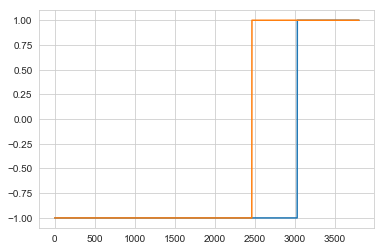

In [33]:
#QDA
train = train.sort_values(['class'])
X = np.array([train['fLength'],train['fWidth'],train['fSize'],train['fConc'],train['fConc1'],train['fAsym'],train['fM3Long'],train['fM3Trans'],train['fAlpha'],train['fDist'],])
X = np.transpose(X)
T = np.array(train['class'])
T = np.reshape(T,(T.shape[0],1))

qd = QDA()
qd.train(X,T) 

X_test = np.array([test['fLength'],test['fWidth'],test['fSize'],test['fConc'],test['fConc1'],test['fAsym'],test['fM3Long'],test['fM3Trans'],test['fAlpha'],test['fDist'],])
X_test = np.transpose(X_test)
T_test = np.array(test['class']) 
Y = qd.use(X_test)
plt.plot(np.sort(Y,0))
#print (len(T_test))
plt.plot(np.sort(T_test,0))
plt.show()

### Observation

- As we can see from the graph, the actual data and the predicted data are not following same path always. This can be seen in the reduction in the accuracy.

- It has high accuracy. It can be seen as the expected and actual values follow almost same path.

## QDA statistics

In [34]:
stat.confusion_matrix(Y, T_test)

-1    1
-1  2341  690
 1   123  650

In [35]:
stat.performance_metrics(Y, T_test)

Accuracy  78.62776025236593 %
Precision  0.8408796895213454
Recall  0.48507462686567165
Specificity  0.9500811688311688
f1 score  0.6152389966871746
Area under curve  0.8066160242393926


### Discussion about the accuracy

- The QDA algorithm gives better results. It has high accuracy rate and other evaluation metrics.


- QDA gives better results in less time compared to pocket algorithm.


- There is no need to change the numbber of iterations and calculate the accuracy in the QDA.

## LDA training and testing

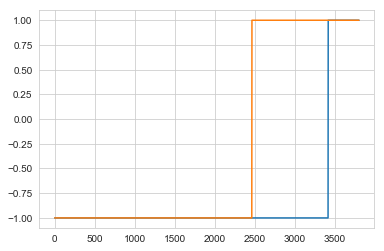

In [36]:
#LDA
X = np.array([train['fLength'],train['fWidth'],train['fSize'],train['fConc'],train['fConc1'],train['fAsym'],train['fM3Long'],train['fM3Trans'],train['fAlpha'],train['fDist'],])
X = np.transpose(X)
T = np.array(train['class'])
T = np.reshape(T,(T.shape[0],1))

ld = LDA()
ld.train(X,T) 

X_test = np.array([test['fLength'],test['fWidth'],test['fSize'],test['fConc'],test['fConc1'],test['fAsym'],test['fM3Long'],test['fM3Trans'],test['fAlpha'],test['fDist'],])
X_test = np.transpose(X_test)
T_test = np.array(test['class']) 
Y = ld.use(X_test)
plt.plot(np.sort(Y,0))
plt.plot(np.sort(T_test,0))
plt.show()

### Observation

- As we can see from the graph, the actual data and the predicted data are not following same path always. This can be seen in the reduction in the accuracy.

- It has high accuracy. It can be seen as the expected and actual values follow almost same path.

## LDA statistics

In [37]:
stat.confusion_matrix(Y, T_test)

-1    1
-1  2441  976
 1    23  364

In [38]:
stat.performance_metrics(Y, T_test)

Accuracy  73.73817034700315 %
Precision  0.9405684754521964
Recall  0.2716417910447761
Specificity  0.9906655844155844
f1 score  0.42154024319629413
Area under curve  0.8274689026368385


### Discussion about the accuracy

- LDA algorithm gives almost the same level of accuracy as QDA but f1 score and recall values are less compared to QDA.


- The LDA algorithm gives good results. It has high accuracy rate and other evaluation metrics.


- LDA gives better results in less time compared to pocket algorithm.


- There is no need to change the numbber of iterations and calculate the accuracy in the LDA.

## Logistic Regression  training and testing

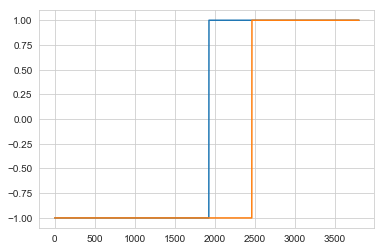

In [42]:
#Logistic
X = np.array([train['fLength'],train['fWidth'],train['fSize'],train['fConc'],train['fConc1'],train['fAsym'],train['fM3Long'],train['fM3Trans'],train['fAlpha'],train['fDist'],])
X = np.transpose(X)
T = np.array(train['class'])
T = np.reshape(T,(T.shape[0],1))

logi = logistic()
logi.train(X,T) 

X_test = np.array([test['fLength'],test['fWidth'],test['fSize'],test['fConc'],test['fConc1'],test['fAsym'],test['fM3Long'],test['fM3Trans'],test['fAlpha'],test['fDist'],])
X_test = np.transpose(X_test)
T_test = np.array(test['class']) 
Y = logi.use(X_test)
plt.plot(np.sort(Y,0))
plt.plot(np.sort(T_test,0))
plt.show()

### Observation

- As we can see from the graph, the actual data and the predicted data are not following same path always. This can be seen in the reduction in the accuracy.

- The graph and the accuracy changes each time the number of iteration or learning rate is changed.

## Logistic Regression statistics

In [43]:
stat.confusion_matrix(Y, T_test)

-1    1
-1  1374  553
 1  1090  787

In [44]:
stat.performance_metrics(Y, T_test)

Accuracy  56.808622502628815 %
Precision  0.419286094832179
Recall  0.5873134328358209
Specificity  0.5576298701298701
f1 score  0.4892757227230338
Area under curve  0.5661557614794004


### Discussion about the accuracy

- Logistic regression has less accuracy compared to LDA and QDA.


- The number of iterations in the logistic regression determines the accuracy of the algorithm.


- Since the test data is also taken from shuffled data, that also affects the accuracy of the algorithm.

## Classification models comparison

- Pocket algorithm takes long time to execute.


- QDA and LDA can be trained quickly.


- QDA and LDA give good results compared to  others.


- The implementation of QDA and LDA are also easy.


- QDA and LDA gives same results as they don't need to be given iteration numbers. But pocket algorithm and linear regression accuracies may be changed each time they iteration values are changes.


- The metrics of the four algorithms are computed above. They are used to compare the algorithms.


- Pocket algorithm may give better results but due to reduced training data size, the pocket algorithm accuracy is less compared to others.

# Conclusions

- I learned how to implement all the four binary classification algorithms i.e., Pocket, LDA, QDA, Logistic Regression algorithms.


- I learned how to evaluate a classification model by using different metrics such as accuracy, precision, recall, area under the curve, specificity, etc.


- I learned how to use different libraries like pandas, matplotlib, pandas, scikit, etc that are used in implementing the algorithms.


- I find it difficult to run pocket algorithm on the entire data as it takes too much time.


- I calculated the accuracies with different iterations in pocket algorithm and linear regression algorithm.


- Splitting the data is useful to find the actual performance of the algorithms.


- I found that when sorted data is splitted, the output is biased towards one class label which has more values in the training data.


- My data has unequal number of the target values i.e., one class has more values compared to others. So the I got less accuracy.

# References

[1] pydata.org. seaborn. (2012-2018) Retrieved from pydata.org website: https://seaborn.pydata.org/generated/seaborn.boxplot.html

[2] pydata.org. Plotting. (2012-2018) Retrieved from pydata.org website: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

[3] matplotlib.org. Pyplot tutorial. (2002 - 2012) Retrieved from matplotlib.org website: https://matplotlib.org/users/pyplot_tutorial.html

[4] stackoverflow.com. Normalize data in pandas. (2019) Retrieved from stackoverflow.com website: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas

[5] Fanaee-T, Hadi., & Gama, Joao. Bike Sharing Dataset Data Set. (2013). Retrieved from uci.edu website: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[6] Linear Classification. (2019) Retrieved from uncc.edu website: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.sol.ipynb

[7] Linear Classification. (2019) Retrieved from uncc.edu website: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.sol.ipynb

[8] pydata.org. residplot. (2012-2018) Retrieved from pydata.org website: https://seaborn.pydata.org/generated/seaborn.residplot.html

[9] scikit-learn.org. Area under the curve. (2007 - 2018) Retrieved from scikit-learn.org website: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html